In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv
load_dotenv();

In [3]:
import os
import numpy as np
import pandas as pd

In [281]:
frames = []
season_type = "Regular"
for season_year in [2016, 2017, 2018, 2019]:
    data_season_df = data_manager.get_season_dataframe(season_year=season_year, season_type=season_type)
    frames.append(data_season_df)
new_df = pd.concat(frames)

In [9]:
new_df.drop('Unnamed: 0', axis=1, inplace=True)

In [282]:
new_df.head()

,Game ID,Event Index,Time,Period,Team,Type,Shot Type,Shooter,Goalie,Empty Net,Strength,X,Y,st_X,st_Y
0,2016020001,43,08:21,1,Toronto Maple Leafs (TOR),GOAL,Wrist Shot,Auston Matthews,Craig Anderson,False,Even,-70.0,1.0,70.0,-1.0
1,2016020001,61,10:26,1,Ottawa Senators (OTT),GOAL,Backhand,Bobby Ryan,Frederik Andersen,False,Even,82.0,3.0,82.0,3.0
2,2016020001,71,12:49,1,Ottawa Senators (OTT),GOAL,Slap Shot,Erik Karlsson,Frederik Andersen,False,Even,34.0,-1.0,34.0,-1.0
3,2016020001,80,14:18,1,Toronto Maple Leafs (TOR),GOAL,Snap Shot,Auston Matthews,Craig Anderson,False,Even,-76.0,-28.0,76.0,28.0
4,2016020001,132,01:25,2,Toronto Maple Leafs (TOR),GOAL,Wrist Shot,Auston Matthews,Craig Anderson,False,Even,76.0,-14.0,76.0,-14.0


In [283]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305814 entries, 0 to 68499
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Game ID      305814 non-null  object 
 1   Event Index  305814 non-null  int64  
 2   Time         305814 non-null  object 
 3   Period       305814 non-null  int64  
 4   Team         305814 non-null  object 
 5   Type         305814 non-null  object 
 6   Shot Type    304810 non-null  object 
 7   Shooter      305814 non-null  object 
 8   Goalie       305814 non-null  object 
 9   Empty Net    29032 non-null   object 
 10  Strength     29032 non-null   object 
 11  X            305798 non-null  float64
 12  Y            305797 non-null  float64
 13  st_X         298118 non-null  float64
 14  st_Y         298117 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 37.3+ MB


In [12]:
# Create Coordinates col to use for operations later
new_df['Coordinates'] = new_df.apply(lambda row: np.array([row['st_X'], row['st_Y']]), axis=1)

In [14]:
net_coordinates = np.array([89, 0])

In [ ]:
# Q1 - Distance to net
new_df['Distance to Net'] = new_df.apply(lambda row: np.linalg.norm(row['Coordinates']-net_coordinates), axis=1)

In [16]:
new_df.head()

,Game ID,Event Index,Time,Period,Team,Type,Shot Type,Shooter,Goalie,Empty Net,Strength,X,Y,st_X,st_Y,Coordinates,Distance to Net
0,2016020001,43,08:21,1,Toronto Maple Leafs (TOR),GOAL,Wrist Shot,Auston Matthews,Craig Anderson,False,Even,-70.0,1.0,70.0,-1.0,"[70.0, -1.0]",19.026298
1,2016020001,61,10:26,1,Ottawa Senators (OTT),GOAL,Backhand,Bobby Ryan,Frederik Andersen,False,Even,82.0,3.0,82.0,3.0,"[82.0, 3.0]",7.615773
2,2016020001,71,12:49,1,Ottawa Senators (OTT),GOAL,Slap Shot,Erik Karlsson,Frederik Andersen,False,Even,34.0,-1.0,34.0,-1.0,"[34.0, -1.0]",55.009090
3,2016020001,80,14:18,1,Toronto Maple Leafs (TOR),GOAL,Snap Shot,Auston Matthews,Craig Anderson,False,Even,-76.0,-28.0,76.0,28.0,"[76.0, 28.0]",30.870698
4,2016020001,132,01:25,2,Toronto Maple Leafs (TOR),GOAL,Wrist Shot,Auston Matthews,Craig Anderson,False,Even,76.0,-14.0,76.0,-14.0,"[76.0, -14.0]",19.104973


In [17]:
# Q1 - Relative angle
def calculate_angle(a, b, c):
    
    try:
        a = np.array(a)
        b = np.array(b)
        c = np.array(c)

        ba = a - b
        bc = c - b

        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.degrees(np.arccos(cosine_angle))
        
    except:
        angle = np.nan
    
    return angle

In [18]:
net_coordinates = [89, 0]
p2 = [0, 0]

In [19]:
new_df['Relative Angle'] = new_df.apply(lambda row: calculate_angle(row['Coordinates'], net_coordinates, p2), axis=1)

C:\Users\anniw\AppData\Local\Temp\ipykernel_14940\1762976325.py:11: RuntimeWarning: invalid value encountered in double_scalars
  cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))


In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305814 entries, 0 to 68499
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Game ID          305814 non-null  int64  
 1   Event Index      305814 non-null  int64  
 2   Time             305814 non-null  object 
 3   Period           305814 non-null  int64  
 4   Team             305814 non-null  object 
 5   Type             305814 non-null  object 
 6   Shot Type        304810 non-null  object 
 7   Shooter          305814 non-null  object 
 8   Goalie           305814 non-null  object 
 9   Empty Net        29032 non-null   object 
 10  Strength         29032 non-null   object 
 11  X                305798 non-null  float64
 12  Y                305797 non-null  float64
 13  st_X             298118 non-null  float64
 14  st_Y             298117 non-null  float64
 15  Coordinates      305814 non-null  object 
 16  Distance to Net  298117 non-null  float

In [33]:
# Q1 - is goal (0 or 1)
new_df['Is Goal'] = new_df.apply(lambda row: 1 if row['Type'] == 'GOAL' else 0, axis=1)

In [34]:
# Q1 - empty net (0 or 1)
new_df['Is Empty'] = new_df.apply(lambda row: 1 if row['Empty Net'] == True else 0, axis=1)

In [35]:
new_df.head()

,Game ID,Event Index,Time,Period,Team,Type,Shot Type,Shooter,Goalie,Empty Net,Strength,X,Y,st_X,st_Y,Coordinates,Distance to Net,Relative Angle,Is Goal,Is Empty
0,2016020001,43,08:21,1,Toronto Maple Leafs (TOR),GOAL,Wrist Shot,Auston Matthews,Craig Anderson,False,Even,-70.0,1.0,70.0,-1.0,"[70.0, -1.0]",19.026298,3.012788,1,0
1,2016020001,61,10:26,1,Ottawa Senators (OTT),GOAL,Backhand,Bobby Ryan,Frederik Andersen,False,Even,82.0,3.0,82.0,3.0,"[82.0, 3.0]",7.615773,23.198591,1,0
2,2016020001,71,12:49,1,Ottawa Senators (OTT),GOAL,Slap Shot,Erik Karlsson,Frederik Andersen,False,Even,34.0,-1.0,34.0,-1.0,"[34.0, -1.0]",55.009090,1.041627,1,0
3,2016020001,80,14:18,1,Toronto Maple Leafs (TOR),GOAL,Snap Shot,Auston Matthews,Craig Anderson,False,Even,-76.0,-28.0,76.0,28.0,"[76.0, 28.0]",30.870698,65.095231,1,0
4,2016020001,132,01:25,2,Toronto Maple Leafs (TOR),GOAL,Wrist Shot,Auston Matthews,Craig Anderson,False,Even,76.0,-14.0,76.0,-14.0,"[76.0, -14.0]",19.104973,47.121096,1,0


In [125]:
# Save new df
new_df.to_csv('.\data\processed\Q1.csv',index=False)

In [256]:
df = pd.read_csv('.\data\processed\Q1.csv')

In [257]:
df['Distance to Net'].max()

189.6549498431296

In [258]:
df['Distance to Net'].min()

0.0

In [259]:
df['Relative Angle'].max()

180.0

In [260]:
df['Relative Angle'].min()

0.0

In [261]:
distance_bins = list(range(0, 195, 5))
angle_bins = list(range(0, 185, 5))

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0.5, 1.0, 'Number of shots and goals, binned by distance')

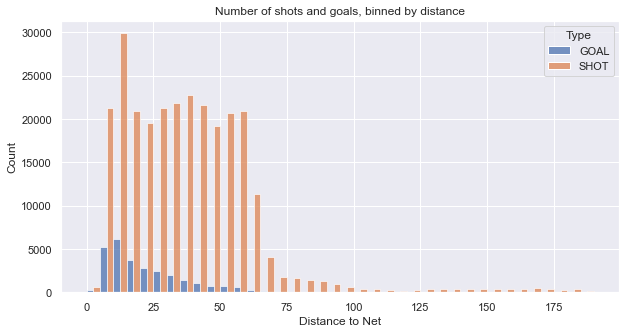

In [263]:
# Q1 - Hist
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x=df["Distance to Net"], hue=df["Type"], bins=distance_bins, multiple="dodge").set_title('Number of shots and goals, binned by distance')

Text(0.5, 1.0, 'Number of shots and goals, binned by distance')

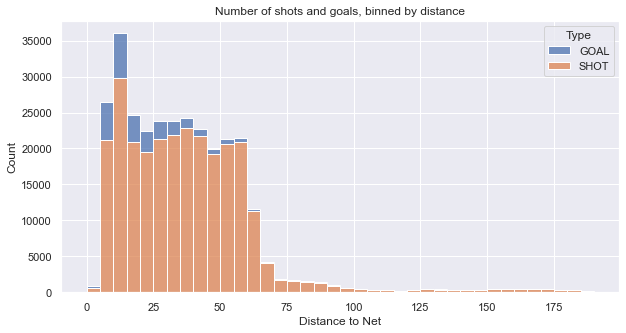

In [264]:
# Stacked histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=df["Distance to Net"], hue=df["Type"], bins=distance_bins, multiple="stack").set_title('Number of shots and goals, binned by distance')

Text(0.5, 1.0, 'Number of shots and goals, binned by angle')

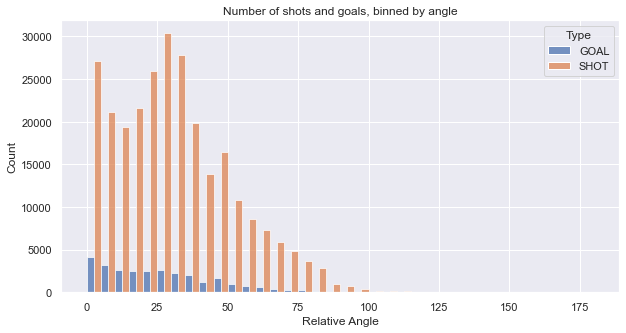

In [265]:
# Q1 - Hist2
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x=df["Relative Angle"], hue=df["Type"], bins=angle_bins, multiple="dodge").set_title('Number of shots and goals, binned by angle')

Text(0.5, 1.0, 'Number of shots and goals, binned by angle')

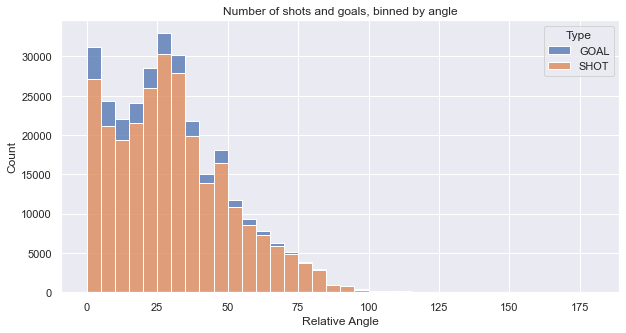

In [266]:
# stacked histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x=df["Relative Angle"], hue=df["Type"], bins=angle_bins, multiple="stack").set_title('Number of shots and goals, binned by angle')

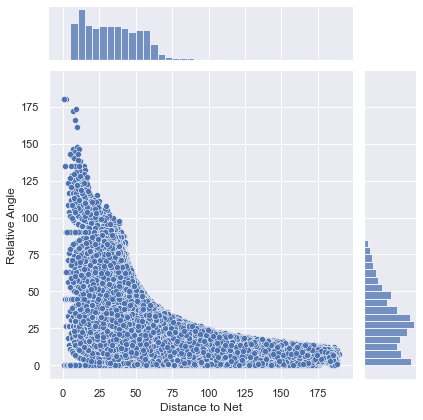

In [267]:
# Q1 - Hist3
sns.jointplot(data=df, x=df["Distance to Net"], y=df["Relative Angle"], marginal_kws=dict(bins=distance_bins))

In [268]:
# Q2
# c.f Visualisations simples for relationship between distance and goal percentage
angle_bins_2 = list(range(0, 185, 10))
df['Angle Bins'] = pd.cut(df['Relative Angle'], bins=angle_bins_2, right=False)

In [275]:
tmp = pd.pivot_table(df, values='Is Goal', index='Angle Bins', columns='Type', aggfunc='count').reset_index()
tmp.columns.name=None
tmp

,Angle Bins,GOAL,SHOT
0,"[0, 10)",7275,48258
1,"[10, 20)",5185,40993
2,"[20, 30)",5104,56300
3,"[30, 40)",4262,47679
4,"[40, 50)",2852,30274
5,"[50, 60)",1715,19372
6,"[60, 70)",986,13125
7,"[70, 80)",526,8491
8,"[80, 90)",166,3725
9,"[90, 100)",104,1083


In [276]:
def calculate_percentage(a, b):
    try:
        result = (a/(a+b))*100
    except:
        result = np.nan
    return result
tmp['Goal Percentage'] = tmp.apply(lambda row : calculate_percentage(row['GOAL'], row['SHOT']), axis=1)

In [277]:
tmp

,Angle Bins,GOAL,SHOT,Goal Percentage
0,"[0, 10)",7275,48258,13.100319
1,"[10, 20)",5185,40993,11.228291
2,"[20, 30)",5104,56300,8.312162
3,"[30, 40)",4262,47679,8.205464
4,"[40, 50)",2852,30274,8.609551
5,"[50, 60)",1715,19372,8.132973
6,"[60, 70)",986,13125,6.987457
7,"[70, 80)",526,8491,5.833426
8,"[80, 90)",166,3725,4.266255
9,"[90, 100)",104,1083,8.761584


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '[0, 10)'),
  Text(1, 0, '[10, 20)'),
  Text(2, 0, '[20, 30)'),
  Text(3, 0, '[30, 40)'),
  Text(4, 0, '[40, 50)'),
  Text(5, 0, '[50, 60)'),
  Text(6, 0, '[60, 70)'),
  Text(7, 0, '[70, 80)'),
  Text(8, 0, '[80, 90)'),
  Text(9, 0, '[90, 100)'),
  Text(10, 0, '[100, 110)'),
  Text(11, 0, '[110, 120)'),
  Text(12, 0, '[120, 130)'),
  Text(13, 0, '[130, 140)'),
  Text(14, 0, '[140, 150)'),
  Text(15, 0, '[150, 160)'),
  Text(16, 0, '[160, 170)'),
  Text(17, 0, '[170, 180)')])

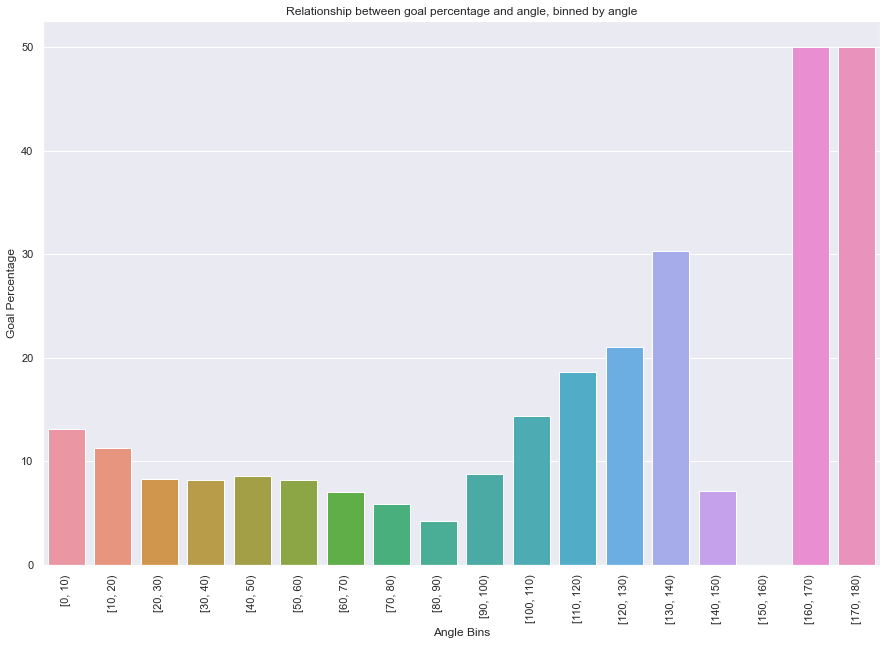

In [278]:
plt.figure(figsize=(15, 10))
sns.barplot(data=tmp, x="Angle Bins", y="Goal Percentage").set_title('Relationship between goal percentage and angle, binned by angle')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Number of goals, binned by distance')

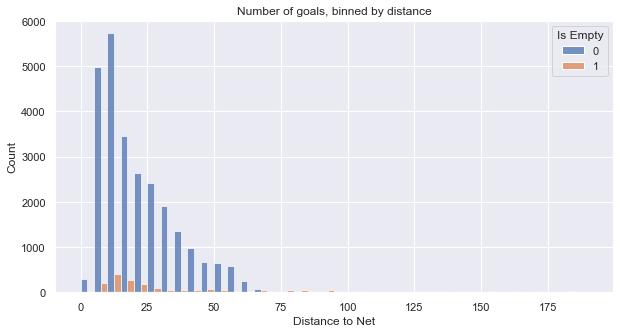

In [279]:
# Q3
df_goals = df[df['Type'] == 'GOAL']
plt.figure(figsize=(10, 5))
sns.histplot(data=df_goals, x=df_goals["Distance to Net"], hue=df_goals["Is Empty"], bins=distance_bins, multiple="dodge").set_title('Number of goals, binned by distance')

In [280]:
# Check for goal in defensive net without empty net
df_goals[(df_goals['Is Empty'] == 0) & (df_goals['st_X'] < -25)]

,Game ID,Event Index,Time,Period,Team,Type,Shot Type,Shooter,Goalie,Empty Net,...,X,Y,st_X,st_Y,Coordinates,Distance to Net,Relative Angle,Is Goal,Is Empty,Angle Bins
1764,2016020030,241,07:59,3,New York Islanders (NYI),GOAL,Wrist Shot,John Tavares,John Gibson,False,...,-33.0,-21.0,-33.0,-21.0,[-33. -21.],123.794184,9.766679,1,0,"[0, 10)"
4562,2016020077,145,09:24,2,Edmonton Oilers (EDM),GOAL,Snap Shot,Mark Letestu,Connor Hellebuyck,False,...,76.0,-2.0,-76.0,2.0,[-76. 2.],165.012121,0.694460,1,0,"[0, 10)"
4563,2016020077,154,11:10,2,Edmonton Oilers (EDM),GOAL,Snap Shot,Darnell Nurse,Connor Hellebuyck,False,...,79.0,-8.0,-79.0,8.0,[-79. 8.],168.190368,2.726311,1,0,"[0, 10)"
4564,2016020077,187,17:16,2,Edmonton Oilers (EDM),GOAL,Snap Shot,Zack Kassian,Connor Hellebuyck,False,...,73.0,-16.0,-73.0,16.0,[-73. 16.],162.788206,5.640549,1,0,"[0, 10)"
20724,2016020342,126,02:10,2,New York Islanders (NYI),GOAL,Tip-In,Jason Chimera,Matt Murray,False,...,37.0,16.0,-37.0,-16.0,[-37. -16.],127.011810,7.236922,1,0,"[0, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294368,2019020902,201,19:18,2,Colorado Avalanche (COL),GOAL,Wrist Shot,Samuel Girard,Jonathan Quick,False,...,-52.0,11.0,-52.0,11.0,[-52. 11.],141.428427,4.460848,1,0,"[0, 10)"
294369,2019020902,292,19:05,3,Los Angeles Kings (LAK),GOAL,Wrist Shot,Tyler Toffoli,Pavel Francouz,False,...,-62.0,-2.0,-62.0,-2.0,[-62. -2.],151.013244,0.758840,1,0,"[0, 10)"
299911,2019020989,35,08:19,1,Minnesota Wild (MIN),GOAL,Wrist Shot,Ryan Donato,Jimmy Howard,False,...,-76.0,-3.0,-76.0,-3.0,[-76. -3.],165.027270,1.041627,1,0,"[0, 10)"
300628,2019021001,176,13:14,2,Los Angeles Kings (LAK),GOAL,Wrist Shot,Dustin Brown,Mackenzie Blackwood,False,...,-77.0,5.0,-77.0,5.0,[-77. 5.],166.075284,1.725255,1,0,"[0, 10)"
